<a href="https://colab.research.google.com/github/Avi1874772/TravelTide_Project/blob/main/IQR_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
pip install pandas

In [59]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/drive/My Drive/Traveltide.csv'

df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
df.head()

,trip_id,user_id,origin_airport,destination,seats,destination_airport,return_flight_booked,departure_time,return_time,checked_bags,...,birthdate,gender,married,has_children,home_country,home_city,home_airport,home_airport_lat,home_airport_lon,sign_up_date
0,NaN,385689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1974-10-08,F,False,True,usa,nashville,BNA,36.124,-86.678,2022-10-29
1,NaN,388767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1979-09-13,F,True,True,usa,tallahassee,TLH,30.396,-84.350,2022-10-31
2,NaN,452612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1981-05-05,F,True,True,usa,rochester,ROC,43.119,-77.672,2022-12-06
3,NaN,506186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1998-06-17,F,False,False,usa,detroit,DTW,42.212,-83.353,2023-01-02
4,NaN,509516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1978-06-24,F,False,False,usa,colorado springs,COS,38.806,-104.700,2023-01-04


In [61]:
df.info()
column_names = df.columns

print(column_names)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49211 entries, 0 to 49210
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  14270 non-null  object 
 1   user_id                  49211 non-null  int64  
 2   origin_airport           14270 non-null  object 
 3   destination              14270 non-null  object 
 4   seats                    14270 non-null  float64
 5   destination_airport      14270 non-null  object 
 6   return_flight_booked     14270 non-null  object 
 7   departure_time           14270 non-null  object 
 8   return_time              13652 non-null  object 
 9   checked_bags             14270 non-null  float64
 10  trip_airline             14270 non-null  object 
 11  destination_airport_lat  14270 non-null  float64
 12  destination_airport_lon  14270 non-null  float64
 13  base_fare_usd            14270 non-null  float64
 14  hotel_name            

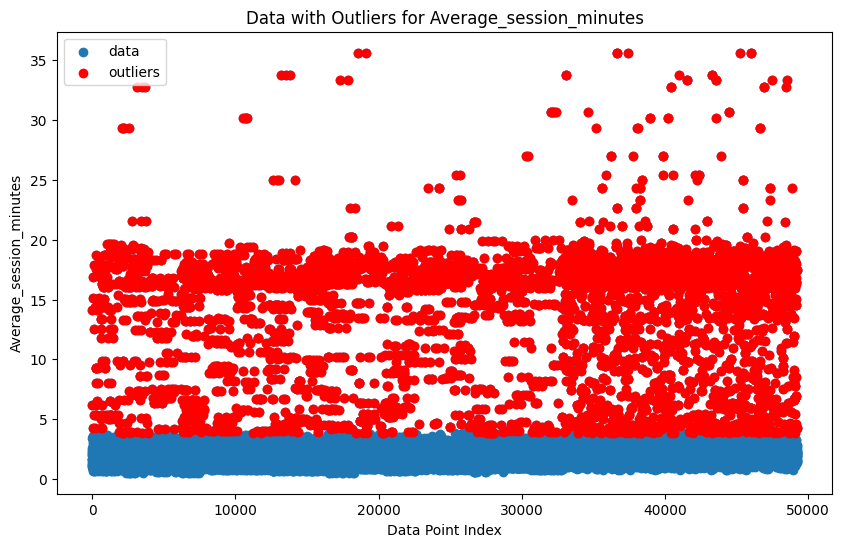

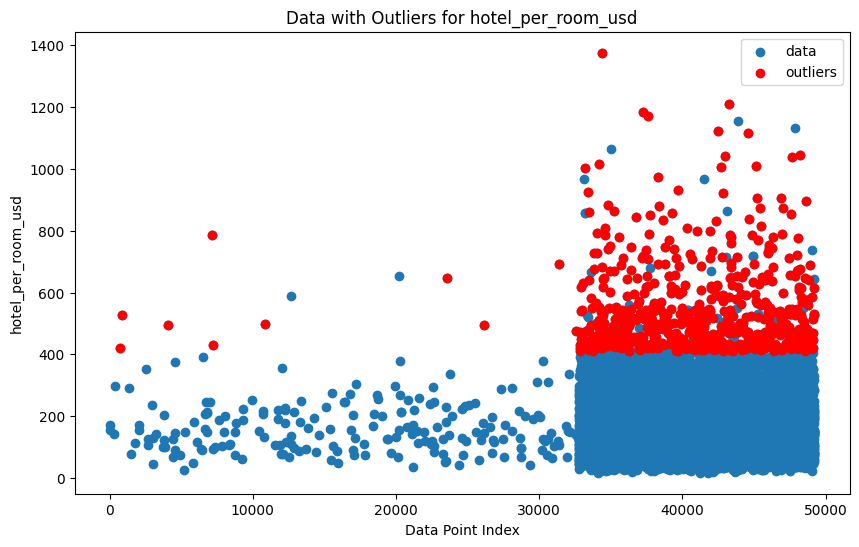

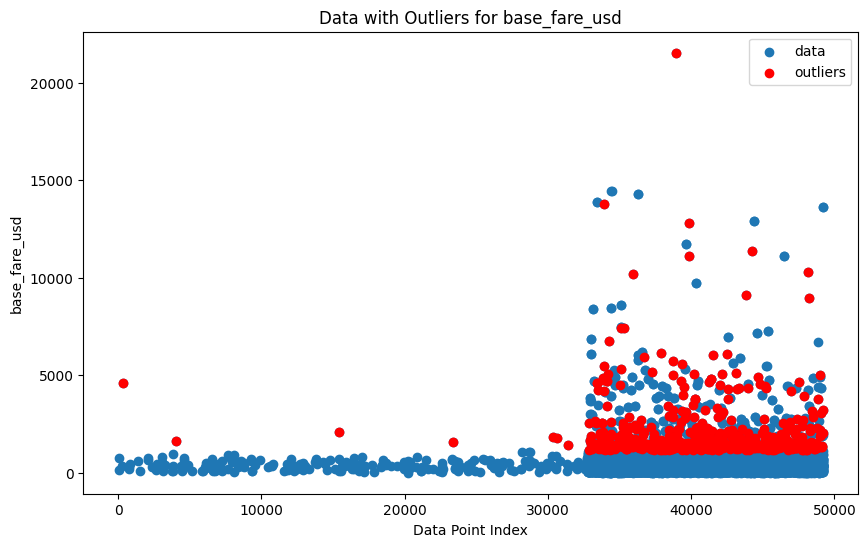

Data with Outliers Removed:
                                       trip_id  user_id origin_airport  \
0                                          NaN   385689            NaN   
1                                          NaN   388767            NaN   
3                                          NaN   506186            NaN   
4                                          NaN   509516            NaN   
5                                          NaN   509826            NaN   
...                                        ...      ...            ...   
49203  569792-a4c280afaf9d4412bf0707bb2c3c50d4   569792            TUL   
49204  552809-e91b1251ef274ee09b4ff1fbe6e55b08   552809            BNA   
49205                                      NaN   678536            NaN   
49207  518416-cca5cea3fac04cdf8d069e13891f016a   518416            EFD   
49208  406210-6c29806425804fe2b4da095371e25cfb   406210            ANC   

       destination  seats destination_airport return_flight_booked  \
0            

In [62]:
# Average session calculation in minutes
df['Average_session_minutes'] = df['total_duration_minutes'] / df['session_count']

# outliers removal using the IQR in the metrics

def remove_outliers(df, columns):
    df_cleaned = df.copy()
    outliers = {}
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        outliers[col] = df_cleaned[(df_cleaned[col] < lower_limit) | (df_cleaned[col] > upper_limit)]
        df_cleaned = df_cleaned[(df_cleaned[col].isna()) | ((df_cleaned[col] >= lower_limit) & (df_cleaned[col] <= upper_limit))]
    return df_cleaned, outliers

columns_check = ['Average_session_minutes', 'hotel_per_room_usd', 'base_fare_usd']

# Call the function to remove outliers and get the outliers dictionary
df_cleaned, outliers = remove_outliers(df, columns_check)

# Plot outliers for each column
for col, outlier_df in outliers.items():
    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df[col], label='data')
    plt.scatter(outlier_df.index, outlier_df[col], color='red', label='outliers')
    plt.xlabel('Data Point Index')
    plt.ylabel(col)
    plt.title(f'Data with Outliers for {col}')
    plt.legend()
    plt.show()

print('Data with Outliers Removed:')
print(df_cleaned)

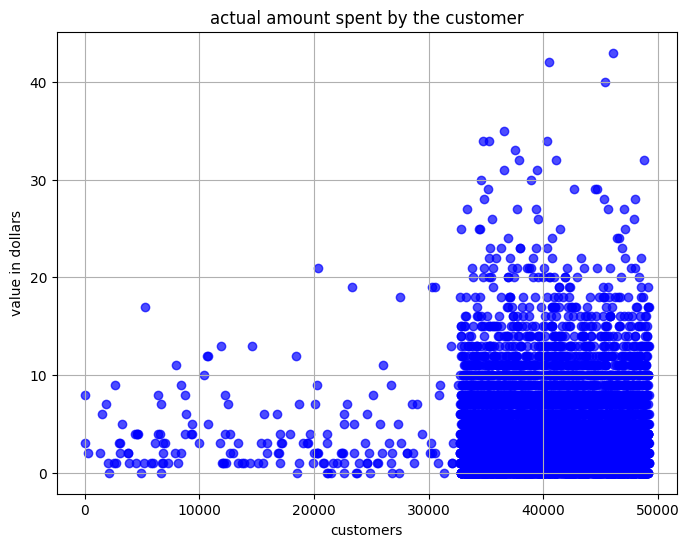

                                       trip_id  user_id origin_airport  \
0                                          NaN   385689            NaN   
1                                          NaN   388767            NaN   
3                                          NaN   506186            NaN   
4                                          NaN   509516            NaN   
5                                          NaN   509826            NaN   
...                                        ...      ...            ...   
49203  569792-a4c280afaf9d4412bf0707bb2c3c50d4   569792            TUL   
49204  552809-e91b1251ef274ee09b4ff1fbe6e55b08   552809            BNA   
49205                                      NaN   678536            NaN   
49207  518416-cca5cea3fac04cdf8d069e13891f016a   518416            EFD   
49208  406210-6c29806425804fe2b4da095371e25cfb   406210            ANC   

       destination  seats destination_airport return_flight_booked  \
0              NaN    NaN                

In [63]:
# Negative values removal from the column "nights_stayed"

outliers = df_cleaned[df_cleaned['nights_stayed'] < 0]

df_cleaned = df_cleaned.drop(outliers.index)


df_cleaned['nights_stayed']
plt.figure(figsize=(8,6))
plt.scatter(df_cleaned.index, df_cleaned['nights_stayed'], marker='o', color='blue', alpha=0.7)
plt.xlabel('customers')
plt.ylabel('value in dollars')
plt.title('actual amount spent by the customer')
plt.grid(True)
plt.show()

df = df_cleaned

print(df)

user_id
23557     1.27750
94883     1.12875
101486    2.03750
101961    1.96250
118043    2.55250
           ...   
785186    2.68500
792549    1.78125
801660    1.76625
811077    1.65250
844489    1.55250
Name: Average_session_minutes, Length: 5394, dtype: float64


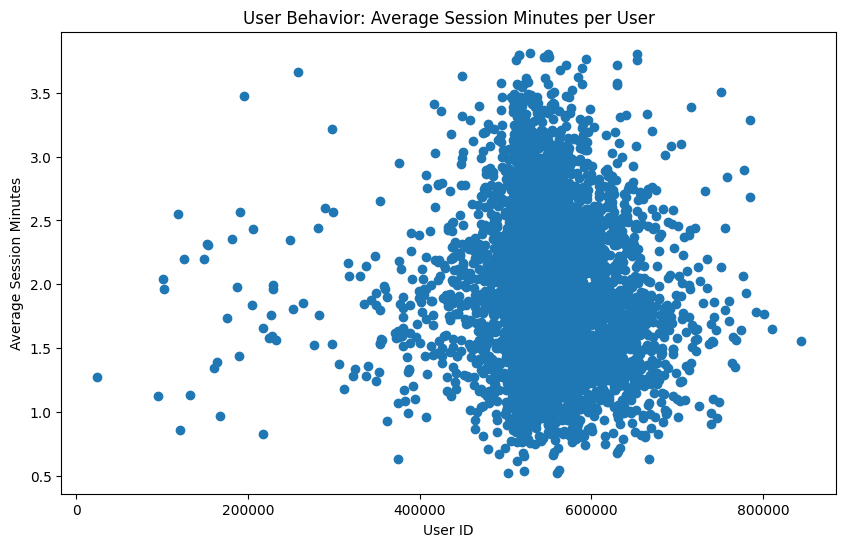

In [64]:
# Group data by user ID
user_groups = df.groupby('user_id')

# Calculate average values for 'column_name' for each user
user_average_data = user_groups['Average_session_minutes'].mean()

user_average_df = user_average_data.reset_index()

# Print the user-level data
print(user_average_data)

plt.figure(figsize=(10, 6))
plt.scatter(user_average_df['user_id'], user_average_df['Average_session_minutes'], label = 'User Behavior')
plt.xlabel('User ID')
plt.ylabel('Average Session Minutes')
plt.title('User Behavior: Average Session Minutes per User')
plt.show()

In [65]:
def haversine_distance(lat1,lon1,lat2,lon2):

  R = 6371 #Radius of the Earth in kilometers

  lat1,lon1,lat2,lon2 = np.radians([lat1,lon1,lat2,lon2]) #converting lat and lon from degrees to radians

  #haversine formula
  dlat = lat2 - lat1
  dlon = lon2 - lon1

  a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
  distance = R * c

  return distance

In [66]:
# distance travelled in kms calculation
df['distance_travelled_km'] = df.apply(lambda row: haversine_distance(
    row['home_airport_lat'], row['home_airport_lon'],
    row['destination_airport_lat'], row['destination_airport_lon']
), axis=1)

**Additional Metrics for Segmentation**

---


In [67]:
# Age calculation
from datetime import datetime

df['birthdate'] = pd.to_datetime(df['birthdate'])
current_date = pd.to_datetime(datetime.now().date())
df['age'] = (current_date - df['birthdate']).astype('timedelta64[Y]')


# sign up days
df['sign_up_date'] = pd.to_datetime(df['sign_up_date'])
last_date_available = df['sign_up_date'].max()
df['days_since_signup'] = (last_date_available - df['sign_up_date']).dt.days


# Duration of stay
df['departure_time'] = pd.to_datetime(df['departure_time'])
df['return_time'] = pd.to_datetime(df['return_time'])

df['Duration_of_stay'] = (df['return_time'] - df['departure_time']).dt.days

#Average duration of stay
df['Average_duration_stay'] = df['Duration_of_stay'].mean()

# Family status of the customer : 0 - single, 1 - Married but with no children, 2 - Married and having children

df['Family_status'] = 0

df.loc[(df['married'] == True) & (df['has_children'] == False), 'Family_status'] = 1
df.loc[(df['married'] == True) & (df['has_children'] == True), 'Family_status'] = 2

#Average flight discount percentage per customer
average_flight_discount_percent = (df.groupby('user_id')['flight_discount_amount'].sum() / df.groupby('user_id')['base_fare_usd'].sum()) * 100

#Average hotel discount percentage per customer
average_hotel_discount_percent = (df.groupby('user_id')['hotel_discount_amount'].sum() / df.groupby('user_id')['hotel_per_room_usd'].sum()) * 100

#Total discount in dollars

df['flight_discount_dollars'] = df['base_fare_usd'] * (df['flight_discount_amount'] / 100)
df['hotel_discount_dollars'] = df['hotel_per_room_usd'] * (df['hotel_discount_amount'] / 100)
df['total_discount_dollars'] = df['flight_discount_dollars'] + df['hotel_discount_dollars']

#Average discount for total_discount_dollars, flight discount in dollars and hotel discount in dollars
df['average_total_discount'] = df['total_discount_dollars'].mean()
df['average_flight_discount'] = df['flight_discount_dollars'].mean()
df['average_hotel_discount'] = df['hotel_discount_dollars'].mean()


# Conversion of discounts into booking

df['total_discount_conversion'] = (df['flight_discount'] == True) & (df['flight_booked'] == True) | (df['hotel_discount'] == True) & (df['hotel_booked'] == True)
df['flight_discount_conversion'] = (df['flight_discount'] == True) & (df['flight_booked'] == True)
df['hotel_discount_conversion'] = (df['hotel_discount'] == True) & (df['hotel_booked'] == True)

# Total amount spent by the customer

df['total_amount_spent'] = df['base_fare_usd'] + (df['hotel_per_room_usd'] * df['rooms_booked']) - df['total_discount_dollars']

#Average amount spent by the customer

df['Average_amount_spent'] = df.groupby('user_id')['total_amount_spent'].mean()

# Average dollars saved, with respect to the distance travelled per kms

total_dollars_saved = user_groups['flight_discount_dollars'].sum()
total_distance_per_user = user_groups['distance_travelled_km'].sum()

df['ADS_per_km'] = total_dollars_saved/total_distance_per_user

# Average dollars saved by the customer in the hotel booking

df['total_hotel_discount'] = df['rooms_booked'] * df['hotel_discount_dollars']
df['total_amount_spent_hotel'] = df['rooms_booked'] * df['hotel_per_room_usd']

df['ADS_hotel_booking'] = df['total_amount_spent_hotel'] - df['total_hotel_discount']

# Page clicks per session

df['page_clicks_per_session'] = df['session_count'] / df['total_duration_minutes']

#Average page clicks per session per customer
df['average_page_clicks_per_session'] = (df.groupby('user_id')['page_clicks_per_session'].sum() /  df.groupby('user_id')['session_count'].sum())


# Percentage of flight bookings and hotel booking under discount

df['discount_flight_proportion'] = (df['flight_discount_conversion'].sum() / len(df)) * 100
df['discount_hotel_proportion'] = (df['hotel_discount_conversion'].sum() / len(df)) * 100

# flight and hotel bookings without discounts
df['flights_without_discount'] = df['flight_booked'] & ~df['flight_discount_conversion']
df['hotel_booking_without_discount'] = df['hotel_booked'] & ~df['hotel_discount_conversion']

# Total flights and hotels booked by each user
df['total_flights'] = df.groupby('user_id')['flight_booked'].transform('sum')
df['total_hotels'] = df.groupby('user_id')['hotel_booked'].transform('sum')

# Check if hotel is booked when a flight is booked
df['hotel_booked_with_flight'] = df.apply(lambda row: 1 if row['flight_booked'] == 1 and row['hotel_booked'] == 1 else 0, axis=1)

column_names = df.columns

print(column_names)

print(df.shape)


Index(['trip_id', 'user_id', 'origin_airport', 'destination', 'seats',
       'destination_airport', 'return_flight_booked', 'departure_time',
       'return_time', 'checked_bags', 'trip_airline',
       'destination_airport_lat', 'destination_airport_lon', 'base_fare_usd',
       'hotel_name', 'nights_stayed', 'rooms_booked', 'check_in_time',
       'check_out_time', 'hotel_per_room_usd', 'session_count',
       'total_duration_minutes', 'session_start', 'flight_discount',
       'hotel_discount', 'flight_discount_amount', 'hotel_discount_amount',
       'flight_booked', 'hotel_booked', 'page_clicks', 'cancellation',
       'birthdate', 'gender', 'married', 'has_children', 'home_country',
       'home_city', 'home_airport', 'home_airport_lat', 'home_airport_lon',
       'sign_up_date', 'Average_session_minutes', 'distance_travelled_km',
       'age', 'days_since_signup', 'Duration_of_stay', 'Average_duration_stay',
       'Family_status', 'flight_discount_dollars', 'hotel_discount_dol

 **KMeans Clustering** ( 5 Clusters )

---



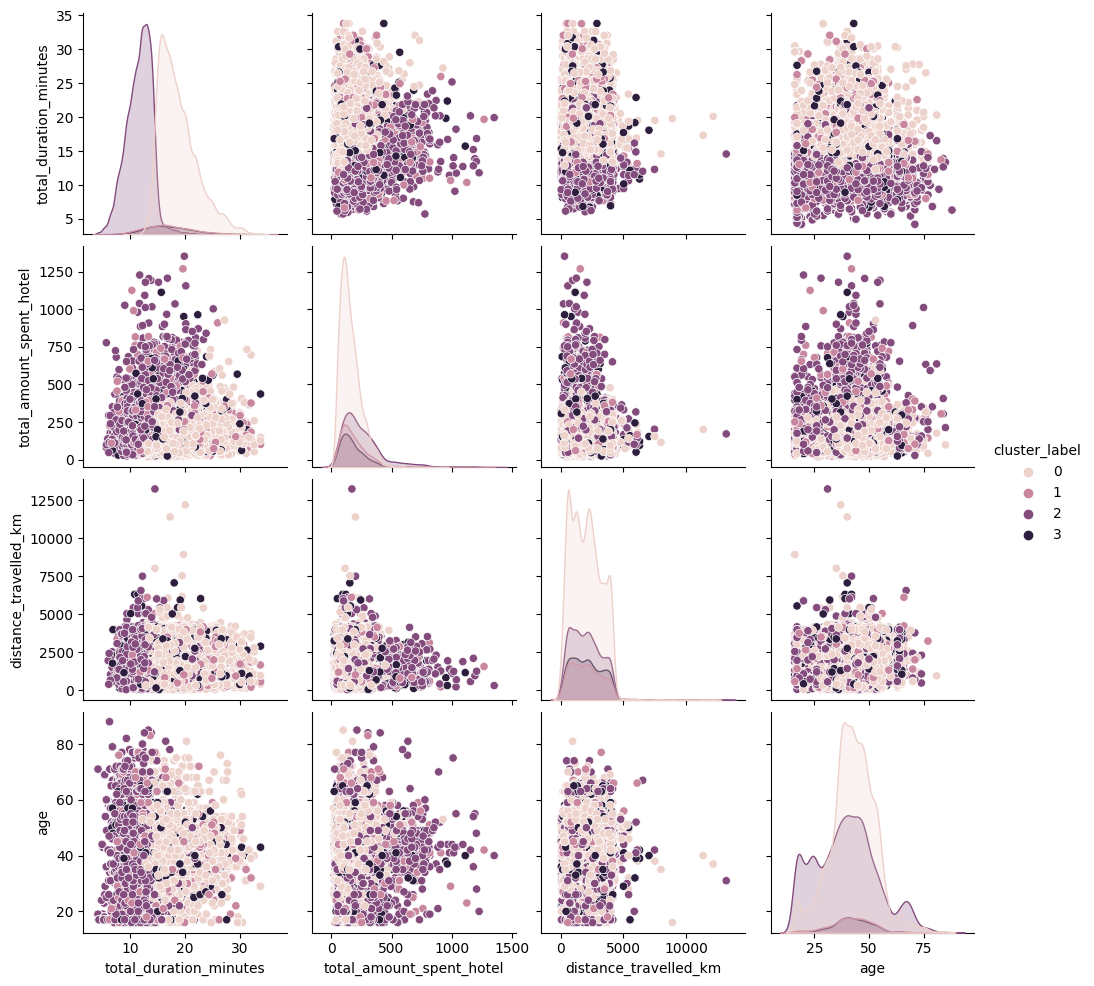

In [68]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns

# Columns for scaling and clustering
selected_columns = [ 'seats', 'checked_bags', 'destination_airport_lat', 'destination_airport_lon',
    'base_fare_usd', 'nights_stayed', 'rooms_booked', 'hotel_per_room_usd',
    'session_count', 'total_duration_minutes', 'flight_discount_amount',
    'hotel_discount_amount', 'distance_travelled_km', 'age', 'days_since_signup',
    'Duration_of_stay', 'average_total_discount', 'average_flight_discount',
    'average_hotel_discount', 'total_discount_conversion', 'flight_discount_conversion',
    'hotel_discount_conversion', 'total_hotel_discount', 'total_amount_spent_hotel',
    'page_clicks_per_session', 'discount_flight_proportion', 'discount_hotel_proportion']


selected_df = df[selected_columns]

# Imputing missing values with 'mean'
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(selected_df)

# Using standard scaler to Standardize the imputed data.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Performing K-means clustering with 5 clusters
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto')
df['cluster_label'] = kmeans.fit_predict(scaled_data)

# Select a subset of features for visualization
visualization_columns = [
    'total_duration_minutes', 'total_amount_spent_hotel', 'distance_travelled_km', 'age',]

# Add 'cluster_label' to the selected DataFrame
selected_df = df[visualization_columns].copy()
selected_df['cluster_label'] = df['cluster_label']

# Create a pair plot
sns.pairplot(data=selected_df, hue='cluster_label', vars=visualization_columns)
plt.show()



In [ ]:
df['cluster_label']

0        2
1        2
3        0
4        3
5        2
        ..
49203    0
49204    0
49205    0
49207    0
49208    2
Name: cluster_label, Length: 43062, dtype: int32

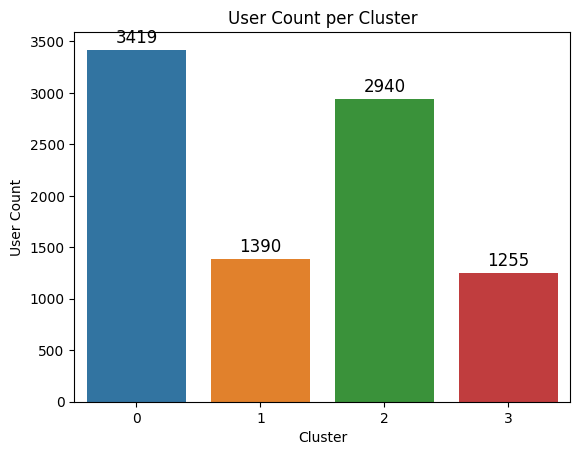

In [ ]:
# Group the data by 'cluster_label' and count unique users in each cluster
cluster_user_counts = df.groupby('cluster_label')['user_id'].nunique().reset_index()

cluster_user_counts.columns = ['Cluster', 'User_Count']

#Bar plot
ax = sns.barplot(x='Cluster', y='User_Count', data=cluster_user_counts)
plt.xlabel('Cluster')
plt.ylabel('User Count')
plt.title('User Count per Cluster')

# Annotations (user count) on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [ ]:
a = df[df['total_amount_spent'] > 0]

total_bookings = len(a)

print(total_bookings)

199


In [ ]:
distinct_user_ids = df_cleaned['user_id'].nunique()

print(distinct_user_ids)

5394


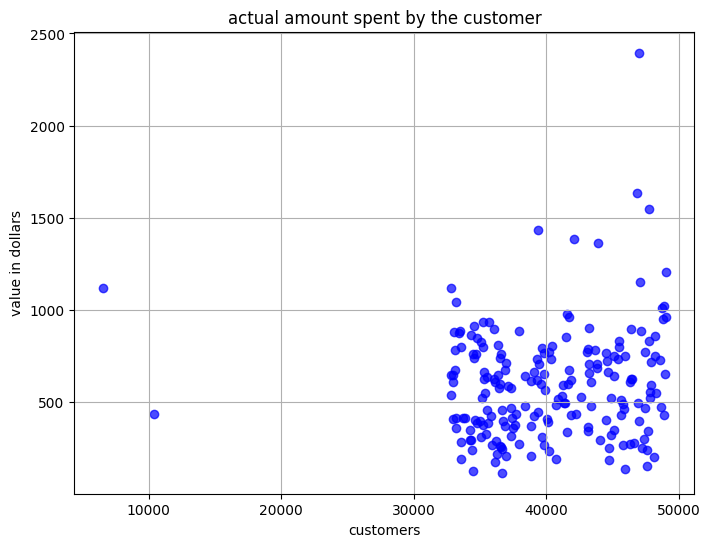

In [ ]:
df_cleaned['total_amount_spent']
plt.figure(figsize=(8,6))
plt.scatter(df_cleaned.index, df_cleaned['total_amount_spent'], marker='o', color='blue', alpha=0.7)
plt.xlabel('customers')
plt.ylabel('value in dollars')
plt.title('actual amount spent by the customer')
plt.grid(True)
plt.show()

In [ ]:
# Assuming you have a DataFrame named 'df'
datetime_columns = df.select_dtypes(include=['datetime64']).columns

# 'datetime_columns' now contains the names of columns with datetime data type
print(datetime_columns)

Index(['departure_time', 'return_time', 'birthdate', 'sign_up_date'], dtype='object')


In [ ]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index(['trip_id', 'origin_airport', 'destination', 'destination_airport',
       'return_flight_booked', 'departure_time', 'return_time', 'trip_airline',
       'hotel_name', 'check_in_time', 'check_out_time', 'session_start',
       'flight_discount', 'hotel_discount', 'flight_booked', 'hotel_booked',
       'birthdate', 'gender', 'married', 'has_children', 'home_country',
       'home_city', 'home_airport', 'sign_up_date',
       'total_discount_conversion', 'flight_discount_conversion',
       'hotel_discount_conversion', 'flights_without_discount',
       'hotel_booking_without_discount'],
      dtype='object')


In [20]:
median_values = df.median()
print(median_values)

<ipython-input-20-a280690b2a9b>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  median_values = df.median()


user_id                            540244.000000
seats                                   1.000000
return_flight_booked                    1.000000
checked_bags                            1.000000
destination_airport_lat                39.872000
destination_airport_lon               -87.752000
base_fare_usd                         360.340000
nights_stayed                           2.000000
rooms_booked                            1.000000
hotel_per_room_usd                    142.000000
session_count                           8.000000
total_duration_minutes                 15.280000
flight_discount                         0.000000
hotel_discount                          0.000000
flight_discount_amount                  0.100000
hotel_discount_amount                   0.100000
flight_booked                           0.000000
hotel_booked                            0.000000
married                                 0.000000
has_children                            0.000000
home_airport_lat    

<ipython-input-20-a280690b2a9b>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = df.median()


**SEGMENTATION**

1. FREE HOTEL MEAL WITH 1 NIGHT FREE HOTEL AND FLIGHT

---



In [ ]:
# Define thresholds
engagement_threshold = 20  # minutes
spending_threshold = 500  # dollars
stay_duration_threshold = 1  # night

# Create segments based on thresholds
df['Segment'] = 'E'  # Initialize with 'E' for customers who don't meet any criteria

# Segment A: Meet all criteria
df.loc[(df['Average_session_minutes'] >= engagement_threshold) &
       (df['Average_amount_spent'] >= spending_threshold) &
       (df['Average_duration_stay'] >= stay_duration_threshold), 'Segment']

Series([], Name: Segment, dtype: object)

2. FREE CHECKED BAGS

---



3. NO CANCELLATION FEES

---



4. EXCLUSIVE DISCOUNTS

---

